# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Spotify API Configuration with Spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred

scope = "user-read-recently-played"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cred.client_ID, client_secret=cred.client_SECRET, redirect_uri=cred.redirect_url, scope=scope))

# results = sp.current_user_recently_played()
# for idx, item in enumerate(results['items']):
#     track = item['track']
#     print(idx, track['artists'][0]['name'], " – ", track['name'])

In [3]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [4]:
vibes_to_reset = analyze_playlist('Matthew Lim','30cdY3LXb1nZBdTY05wEXj')
vibes_to_reset.head()
# csv
# df.to_csv("dataframe.csv", index = False)

artist                  album                track_name  \
0       Mac Ayres             Drive Slow                      Easy   
1   Daniel Caesar               Freudian  Best Part (feat. H.E.R.)   
2     Bruno Major  A Song For Every Moon                    Easily   
3           keshi              skeletons                 skeletons   
4  Kendrick Lamar                  DAMN.       LOVE. FEAT. ZACARI.   

                 track_id  danceability  energy key  loudness mode  \
0  58dSdjfEYNSxte1aNVxuNf         0.722   0.282   5    -7.484    1   
1  1RMJOxR6GRPsBHL8qeC2ux         0.524   0.364   7   -10.209    1   
2  2k9N4caeCIJLOWwWwssrEM         0.772   0.256   7    -8.545    0   
3  2BuJrxYKhYky20dQqTlobO         0.719   0.265   2   -12.782    1   
4  6PGoSes0D9eUDeeAafB2As         0.800   0.585  10    -7.343    1   

   speechiness  instrumentalness  liveness  valence    tempo duration_ms  \
0       0.1060           0.00557     0.147    0.217   91.367      314358   
1       0.0367           0.00000     0.100    0.436   75.240      209831   
2       0.0481           0.00612     0.144    0.357  118.902      210240   
3       0.0754           0.08650     0.108    0.273   80.021      152480   
4       0.0924           0.00000     0.153    0.779  126.058      213400   

  time_signature  
0              4  
1              4  
2              3  
3              4  
4              4

## Playlists Classified as 'Happy'

### First-time Run

### Existing CSV Run

In [6]:
mood_booster = pd.read_csv('mood_booster.csv')
great_day = pd.read_csv('great_day.csv')
good_vibes = pd.read_csv('good_vibes.csv')

In [7]:
happy = pd.concat([mood_booster,great_day,good_vibes],ignore_index=True)
happy.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.733   0.670    5    -6.009     1       0.0751          0.000000   
1         0.717   0.671    0    -5.077     0       0.0337          0.000003   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.1210   0.4720  100.964       192841               4  
1    0.0921   0.6990  110.054       160657               4  
2    0.2240   0.7320  138.992       163648               4  
3    0.1840   0.7520  119.996       182895               5  
4    0.1570   0.0976   96.985       202396               4

In [8]:
happy.duplicated().value_counts()

False    211
True      15
dtype: int64

In [9]:
happy.drop_duplicates(inplace=True)
happy.duplicated().value_counts()

False    211
dtype: int64

In [10]:
happy['mood'] = 1

In [11]:
happy.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.733   0.670    5    -6.009     1       0.0751          0.000000   
1         0.717   0.671    0    -5.077     0       0.0337          0.000003   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  mood  
0    0.1210   0.4720  100.964       192841               4     1  
1    0.0921   0.6990  110.054       160657               4     1  
2    0.2240   0.7320  138.992       163648               4     1  
3    0.1840   0.7520  119.996       182895               5     1  
4    0.1570   0.0976   96.985       202396               4     1

## Playlists Classified as 'Sad'

### First-time Run

### Existing CSV Run

In [13]:
sad_songs = pd.read_csv('sad_songs.csv')
life_sucks = pd.read_csv('life_sucks.csv')
idk = pd.read_csv('idk.csv')

In [14]:
sad = pd.concat([sad_songs,life_sucks,idk],ignore_index=True)
sad.head()

artist                 album            track_name  \
0    Dean Lewis  How Do I Say Goodbye  How Do I Say Goodbye   
1     Cat Burns                    go                    go   
2  James Arthur                   YOU         Car's Outside   
3    Becky Hill   Remember (Acoustic)   Remember - Acoustic   
4  Benson Boone          In The Stars          In The Stars   

                 track_id  danceability  energy  key  loudness  mode  \
0  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   
1  4VtRHZ4tBDHaWltVAytlLY         0.663   0.251    6    -9.870     0   
2  0otRX6Z89qKkHkQ9OqJpKt         0.338   0.562    9    -7.181     1   
3  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
4  1ei3hzQmrgealgRKFxIcWn         0.362   0.540   10    -6.031     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.0674               0.0    0.0656    0.393   81.552       163603   
1       0.0435               0.0    0.0932    0.528   90.272       215000   
2       0.0290               0.0    0.1070    0.259  149.907       248373   
3       0.0412               0.0    0.1950    0.509  118.899       178627   
4       0.0528               0.0    0.1390    0.300   78.007       216410   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               3

In [15]:
sad.duplicated().value_counts()

False    270
True      10
dtype: int64

In [16]:
sad.drop_duplicates(inplace=True)
sad.duplicated().value_counts()

False    270
dtype: int64

In [17]:
sad['mood'] = 2

In [18]:
sad.head()

artist                 album            track_name  \
0    Dean Lewis  How Do I Say Goodbye  How Do I Say Goodbye   
1     Cat Burns                    go                    go   
2  James Arthur                   YOU         Car's Outside   
3    Becky Hill   Remember (Acoustic)   Remember - Acoustic   
4  Benson Boone          In The Stars          In The Stars   

                 track_id  danceability  energy  key  loudness  mode  \
0  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   
1  4VtRHZ4tBDHaWltVAytlLY         0.663   0.251    6    -9.870     0   
2  0otRX6Z89qKkHkQ9OqJpKt         0.338   0.562    9    -7.181     1   
3  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
4  1ei3hzQmrgealgRKFxIcWn         0.362   0.540   10    -6.031     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.0674               0.0    0.0656    0.393   81.552       163603   
1       0.0435               0.0    0.0932    0.528   90.272       215000   
2       0.0290               0.0    0.1070    0.259  149.907       248373   
3       0.0412               0.0    0.1950    0.509  118.899       178627   
4       0.0528               0.0    0.1390    0.300   78.007       216410   

   time_signature  mood  
0               4     2  
1               4     2  
2               4     2  
3               4     2  
4               3     2

## Combining the DataFrame

In [19]:
df = pd.concat([happy,sad],ignore_index=True)
df.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.733   0.670    5    -6.009     1       0.0751          0.000000   
1         0.717   0.671    0    -5.077     0       0.0337          0.000003   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  mood  
0    0.1210   0.4720  100.964       192841               4     1  
1    0.0921   0.6990  110.054       160657               4     1  
2    0.2240   0.7320  138.992       163648               4     1  
3    0.1840   0.7520  119.996       182895               5     1  
4    0.1570   0.0976   96.985       202396               4     1

# EDA

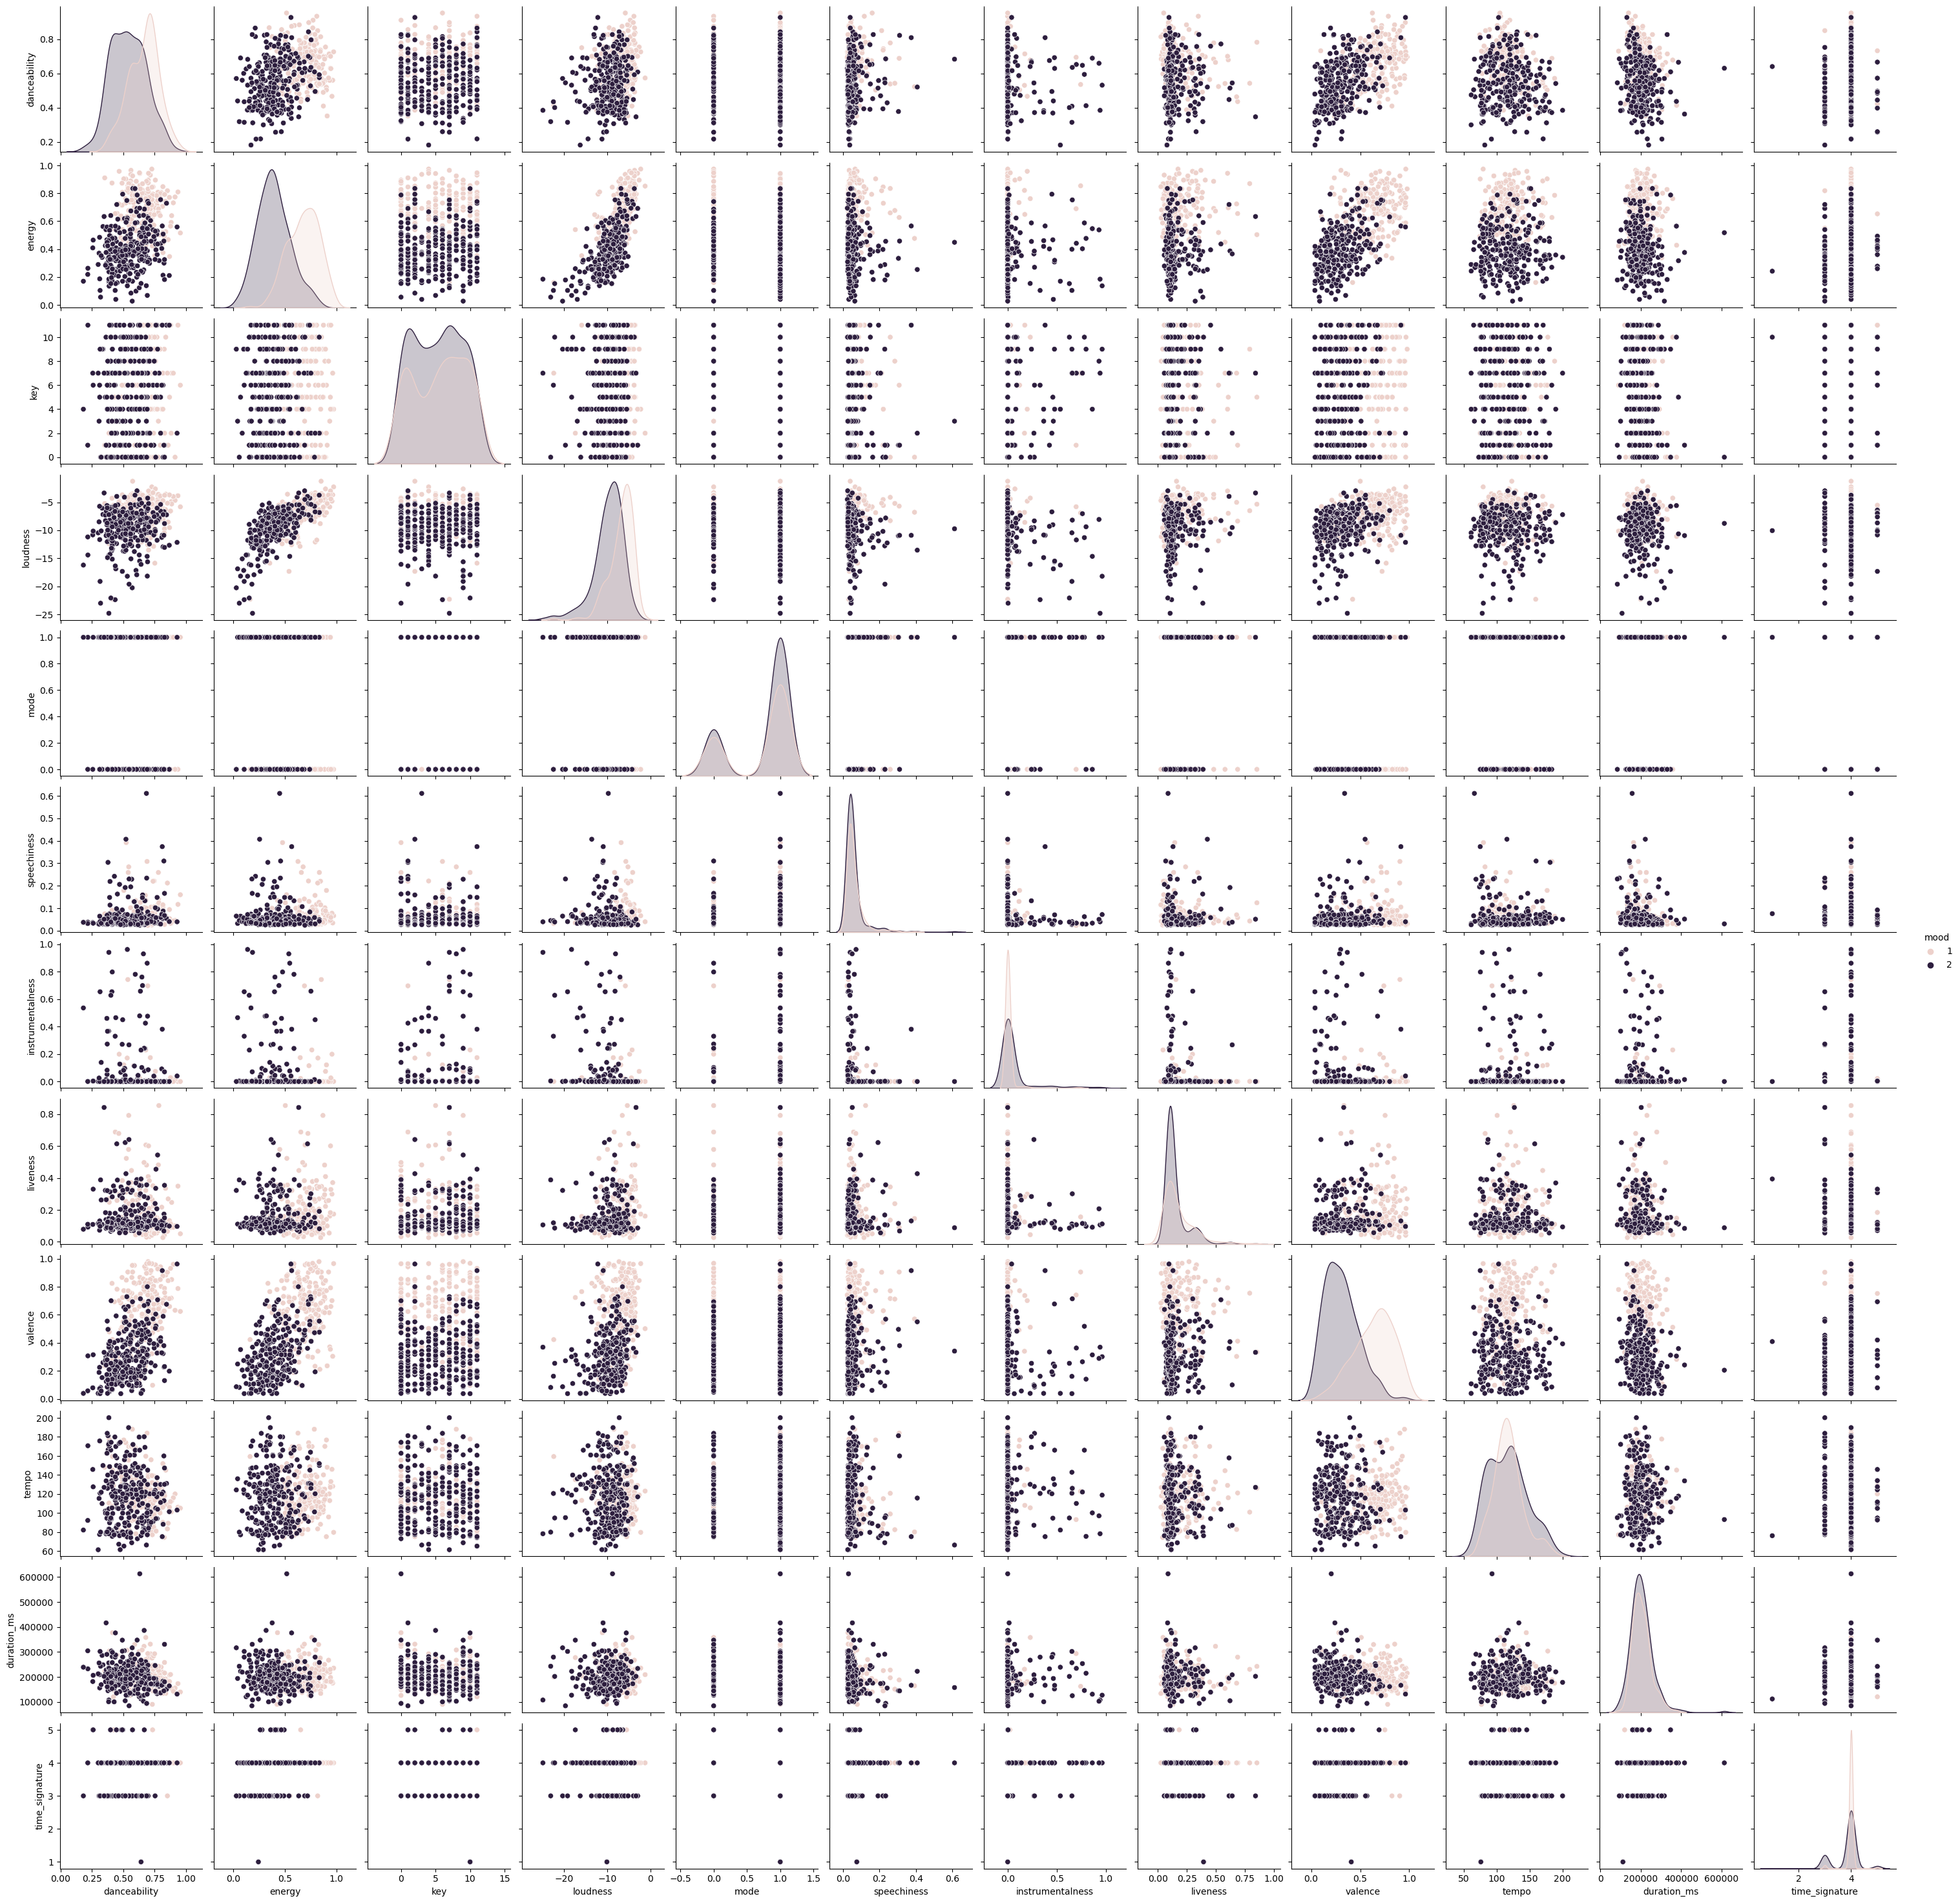

In [20]:
sns.pairplot(df,hue='mood')

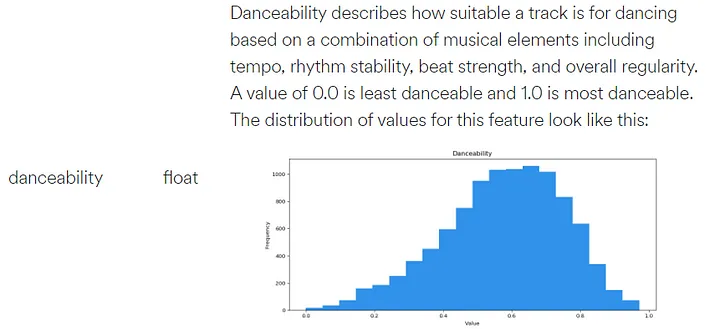

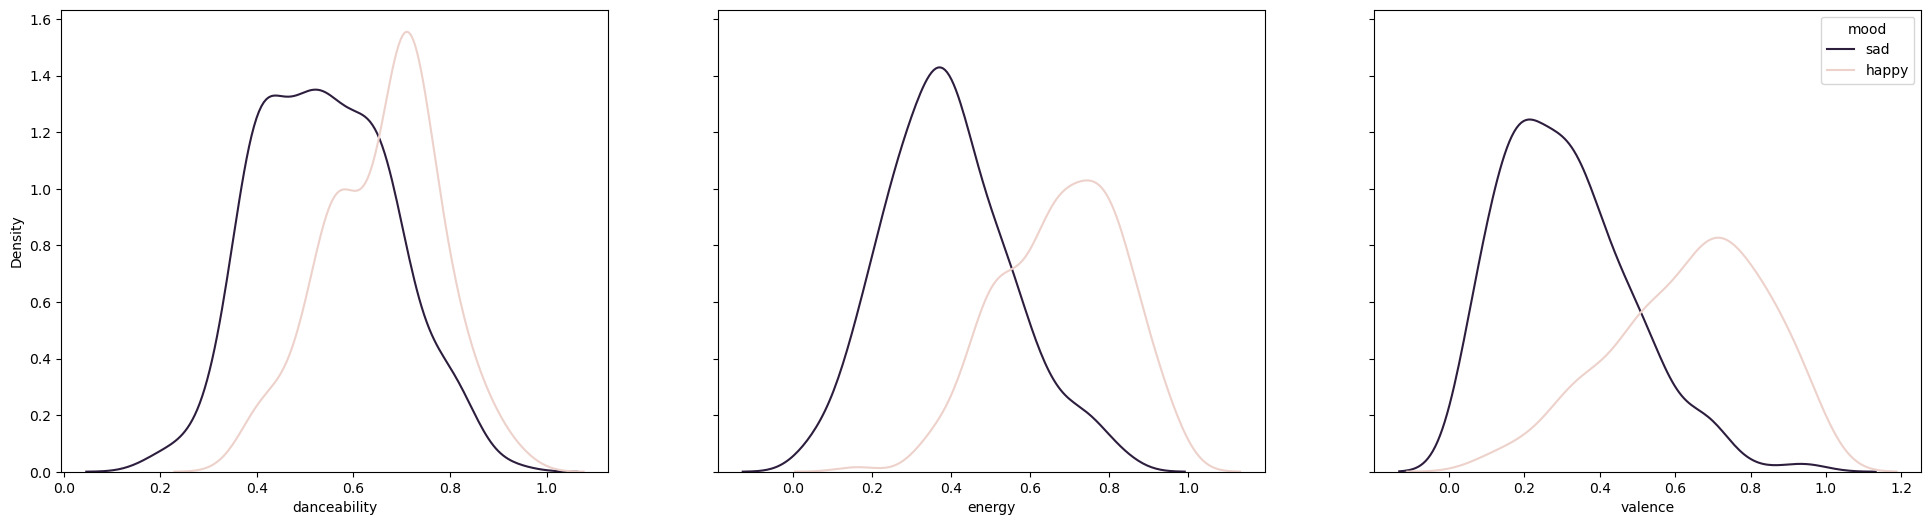

In [21]:
fig, axes = plt.subplots(1,3,figsize=(24,6),sharey=True)
sns.kdeplot(data=df,x='danceability',hue='mood',ax=axes[0])
sns.kdeplot(data=df,x='energy',hue='mood',ax=axes[1])
sns.kdeplot(data=df,x='valence',hue='mood',ax=axes[2])
for ax in axes:
    ax.legend([],[], frameon=False)
ax.legend(title='mood',labels=['sad', 'happy'])
plt.show()

In [22]:
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'mood'],
      dtype='object')

# More Data Preprocessing

## Feature Selection

After running the model with subpar accuracy (~ < 85 avgs), I decided to get rid of irrelevant features that had no correlations to aid in classifying the mood. By using my general knowlege of music theory, as well as the Spotify API's documentation, I kept the relevant features and thereby increased the accuracy averages to the 90% mark.

In [23]:
df.drop(['artist','album','track_name','track_id','speechiness','instrumentalness','liveness','duration_ms','time_signature'],axis=1,inplace=True)

# Test Train Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(['mood'],axis=1)
y = df['mood']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Tree Classification

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [30]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.57      0.67      0.62        52
           2       0.80      0.72      0.76        93

    accuracy                           0.70       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.72      0.70      0.71       145



In [33]:
print(confusion_matrix(y_test,predictions))

[[35 17]
 [26 67]]


## Tree Visualization

In [34]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[:-1])
features

['danceability', 'energy', 'key', 'loudness', 'mode', 'valence', 'tempo']

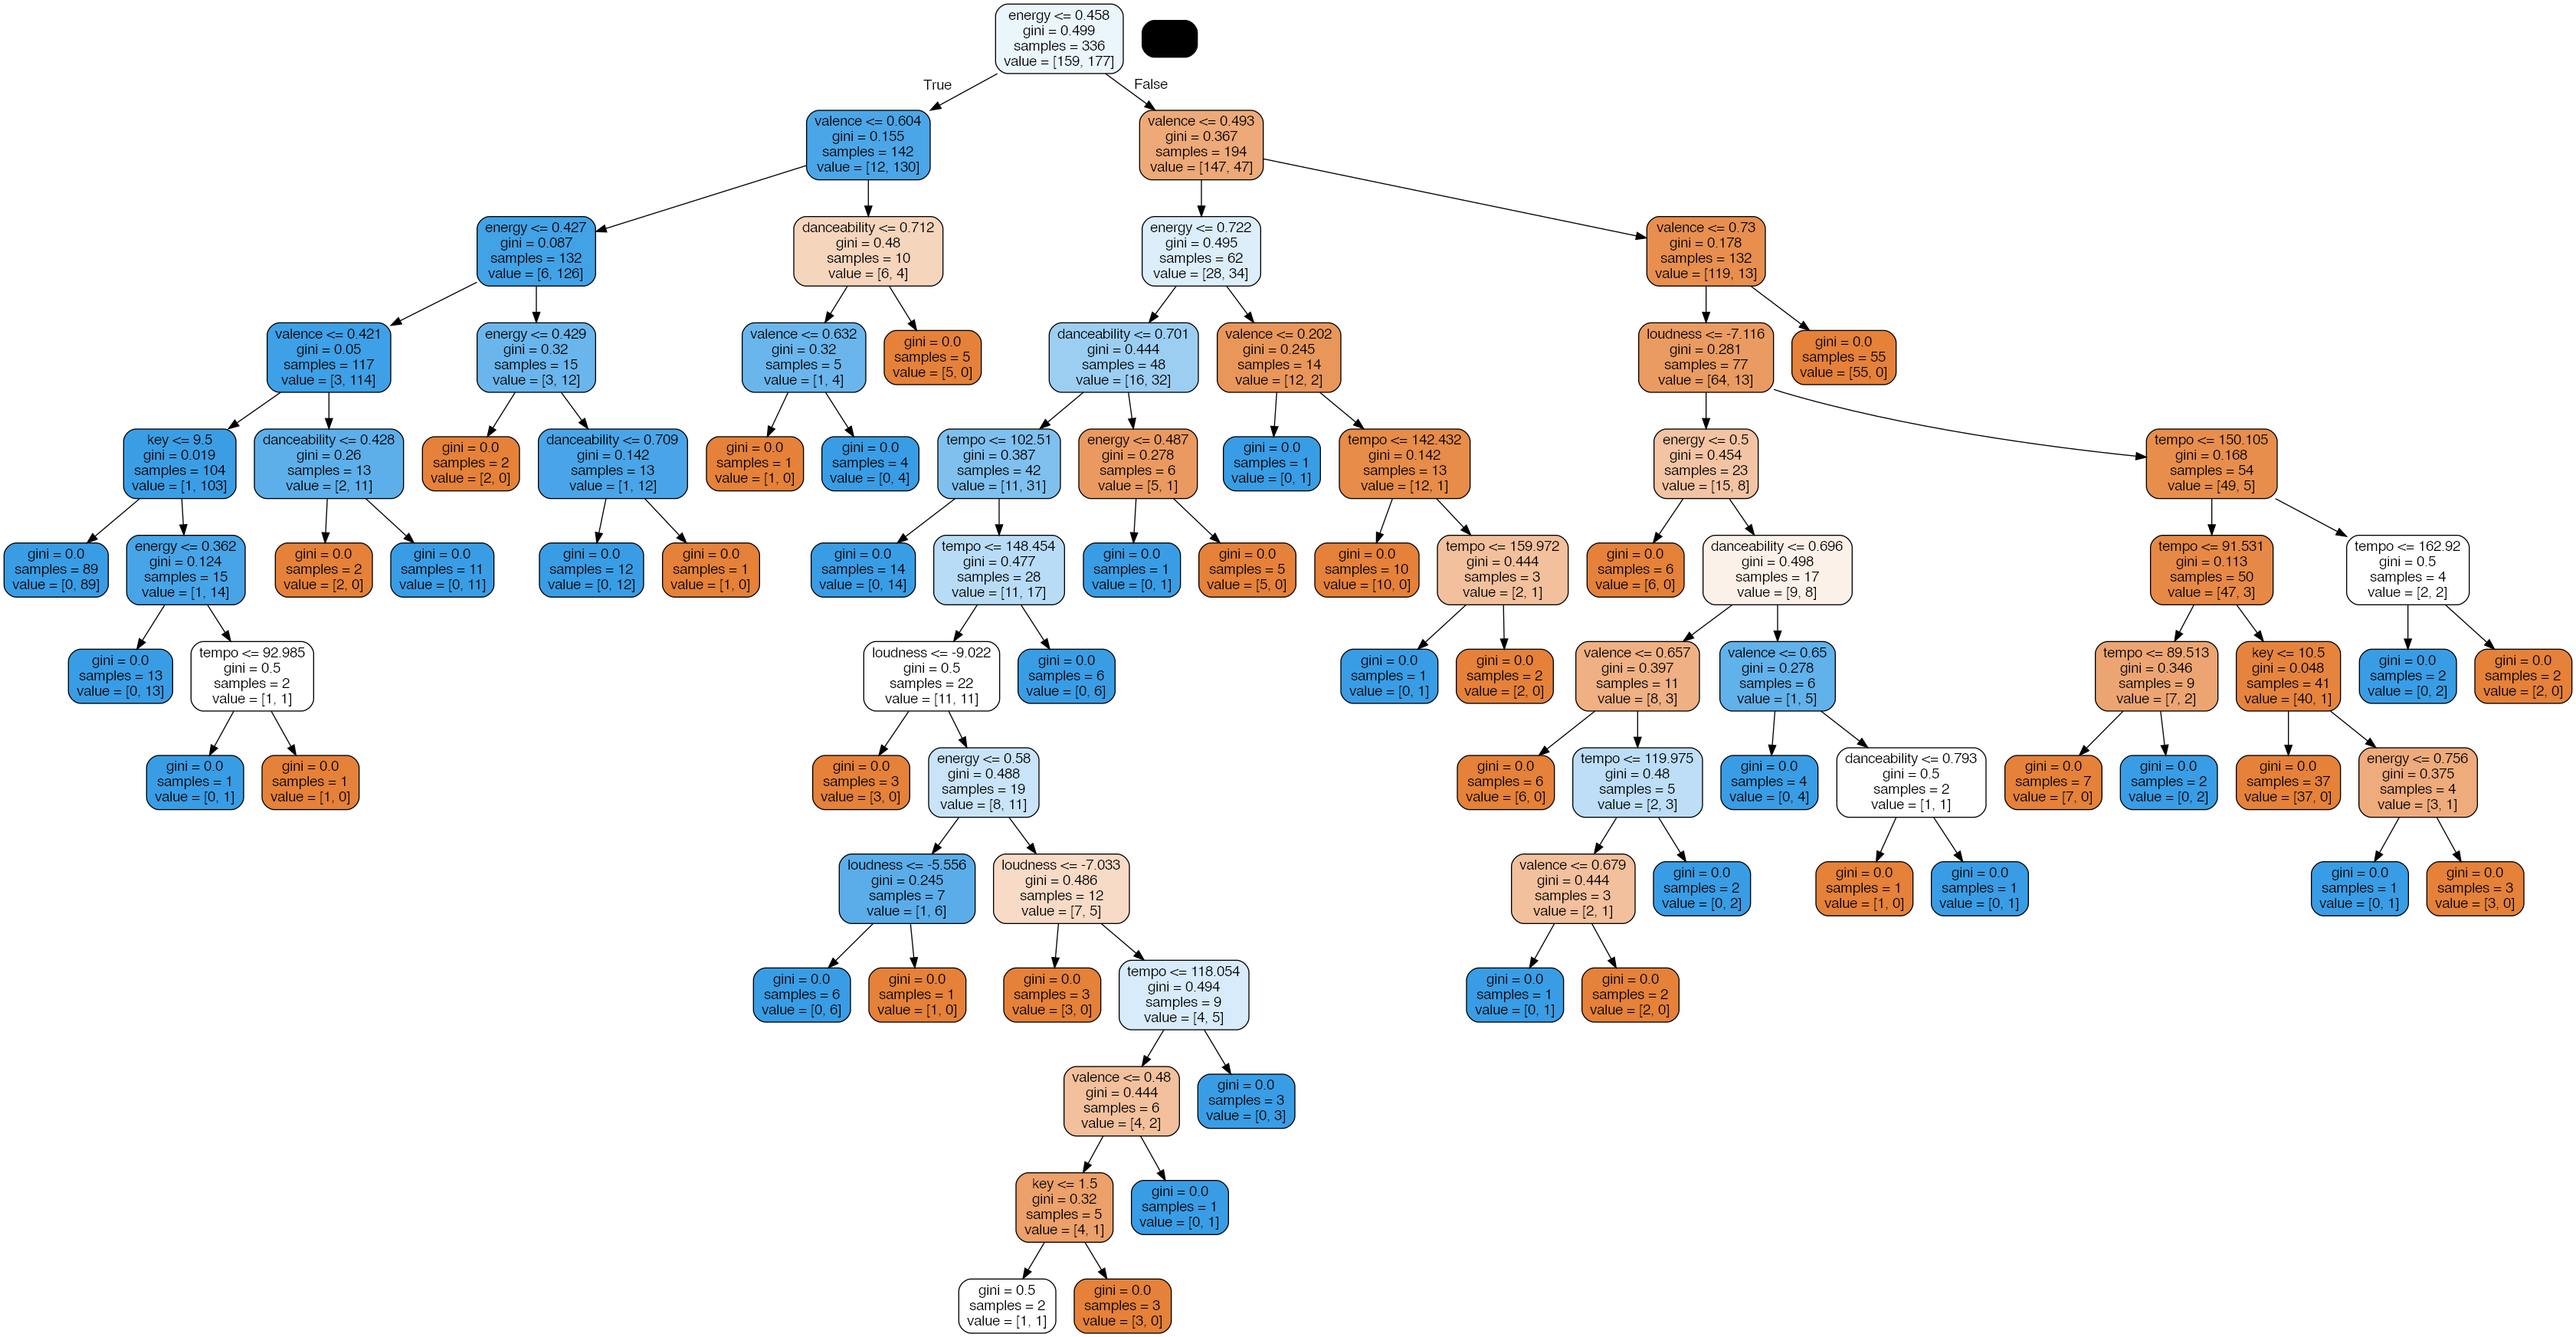

In [35]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest Classification

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=100)

In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluations

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[43  9]
 [15 78]]


In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.74      0.83      0.78        52
           2       0.90      0.84      0.87        93

    accuracy                           0.83       145
   macro avg       0.82      0.83      0.82       145
weighted avg       0.84      0.83      0.84       145



In [42]:
vibes_to_reset.head()

artist                  album                track_name  \
0       Mac Ayres             Drive Slow                      Easy   
1   Daniel Caesar               Freudian  Best Part (feat. H.E.R.)   
2     Bruno Major  A Song For Every Moon                    Easily   
3           keshi              skeletons                 skeletons   
4  Kendrick Lamar                  DAMN.       LOVE. FEAT. ZACARI.   

                 track_id  danceability  energy key  loudness mode  \
0  58dSdjfEYNSxte1aNVxuNf         0.722   0.282   5    -7.484    1   
1  1RMJOxR6GRPsBHL8qeC2ux         0.524   0.364   7   -10.209    1   
2  2k9N4caeCIJLOWwWwssrEM         0.772   0.256   7    -8.545    0   
3  2BuJrxYKhYky20dQqTlobO         0.719   0.265   2   -12.782    1   
4  6PGoSes0D9eUDeeAafB2As         0.800   0.585  10    -7.343    1   

   speechiness  instrumentalness  liveness  valence    tempo duration_ms  \
0       0.1060           0.00557     0.147    0.217   91.367      314358   
1       0.0367           0.00000     0.100    0.436   75.240      209831   
2       0.0481           0.00612     0.144    0.357  118.902      210240   
3       0.0754           0.08650     0.108    0.273   80.021      152480   
4       0.0924           0.00000     0.153    0.779  126.058      213400   

  time_signature  
0              4  
1              4  
2              3  
3              4  
4              4

In [43]:
X_test.iloc[0]

danceability      0.371
energy            0.268
key               1.000
loudness        -10.506
mode              1.000
valence           0.165
tempo           102.617
Name: 224, dtype: float64

In [44]:
vibes_to_reset.drop(['artist','album','track_name','track_id','speechiness','instrumentalness','liveness','duration_ms','time_signature'],axis=1,inplace=True)

In [45]:
easily = vibes_to_reset.iloc[2]

In [46]:
rfc.predict([easily])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

# Hyperparameter Tuning Through K-Fold CV

In [47]:
from pprint import pprint
# RandomForestClassifier().get_params().keys()
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [48]:
from sklearn.model_selection import RandomizedSearchCV


In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
